In [1]:
%load_ext autoreload  
%autoreload 2  

Parameters([('sinusoidal_amp', <Parameter 'sinusoidal_amp', value=1.0000000000000002 +/- 5.06e-17, bounds=[-inf:inf]>), ('sinusoidal_P', <Parameter 'sinusoidal_P', value=360.0 +/- 3.92e-15, bounds=[-inf:inf]>)])


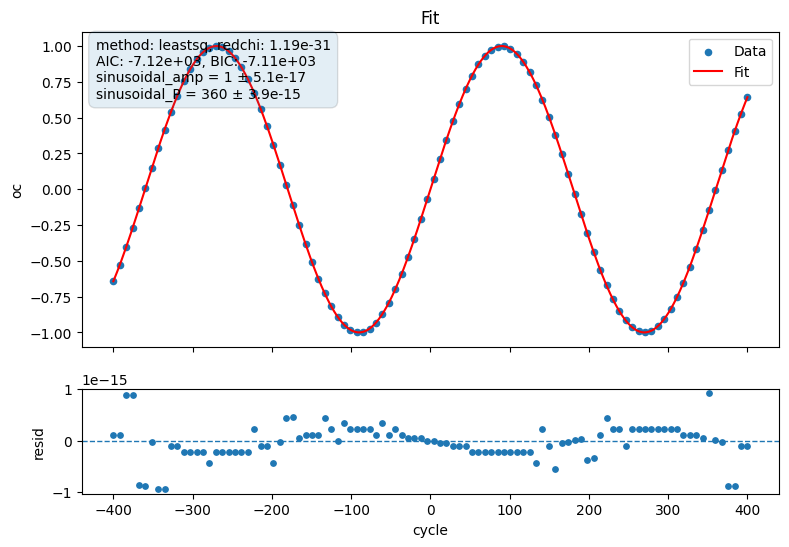

In [2]:
import numpy as np
from ocpy.oc_lmfit import OCLMFit
from ocpy.oc import Parameter, Sinusoidal

cycle = np.linspace(-400, 400, 100)
oc = np.sin(np.deg2rad(cycle))  # periyot = 360

oc_lm = OCLMFit(
    oc=oc,
    cycle=cycle,
    weights=1.0,
)

res = oc_lm.fit_sinusoidal(P=300, amp=0.6)
print(res.params)
oc_lm.fit_and_report(res)

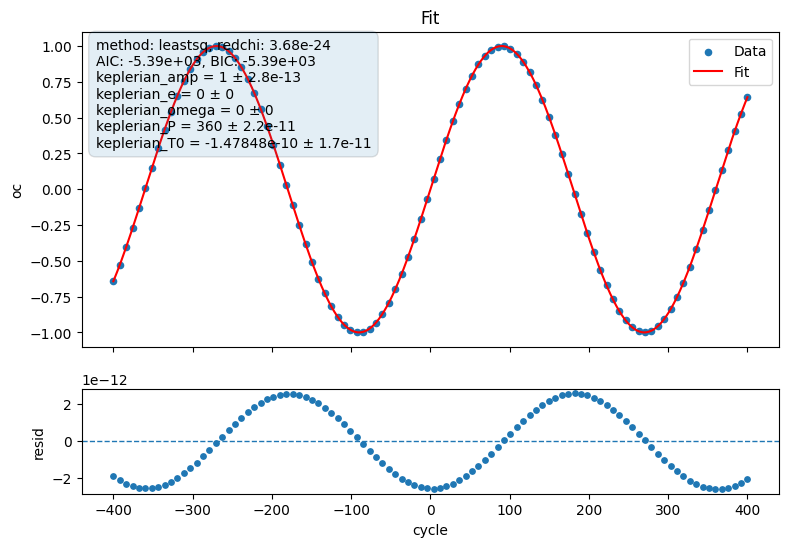

In [3]:
res_kep = oc_lm.fit_keplerian(P=300, amp=0.6, e=Parameter(value=0, fixed=True), omega=Parameter(value=0, fixed=True))

oc_lm.fit_and_report(res_kep)

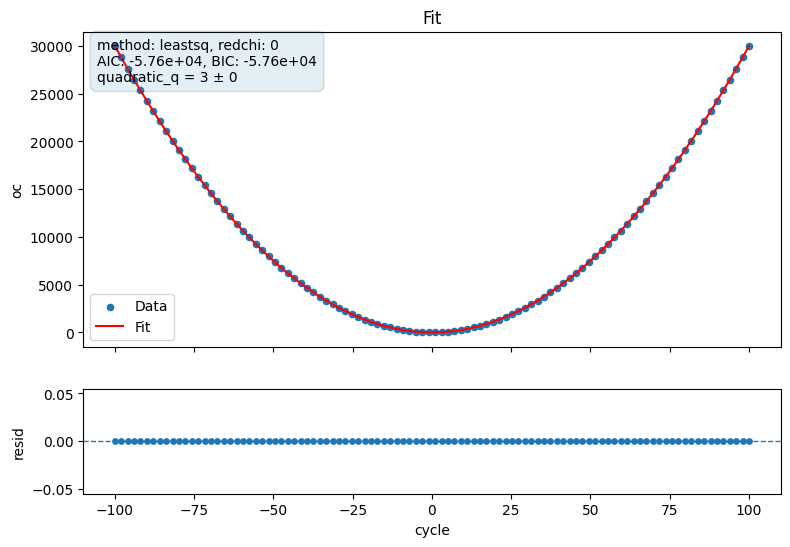

In [4]:
import numpy as np
from ocpy.oc_lmfit import OCLMFit
from ocpy.oc import Keplerian, Parameter, Quadratic

cycle = np.linspace(-100, 100, 100)
oc = 3*cycle**2

oc_lm = OCLMFit(
    oc=oc.tolist(),
    cycle=cycle.tolist(),
    weights=1
)

res = oc_lm.fit_quadratic()
oc_lm.fit_and_report(res)

In [5]:
import numpy as np
from ocpy.oc import Linear, Quadratic, Keplerian, Parameter, OC
from ocpy.oc_lmfit import OCLMFit

t = np.linspace(0, 5000, 100)

lin = Linear(
    a=Parameter(value=1.2e-6),
    b=Parameter(value=-3.5e-3),
)
quad = Quadratic(
    q=Parameter(value=1e-10),
)
kep = Keplerian(
    amp=Parameter(value=8e-4),
    e=Parameter(value=0.25),
    omega=Parameter(value=110.0),
    P=Parameter(value=1200.0),
    T0=Parameter(value=300.0),
)

y_lin = lin.model_func(t, lin.params["a"].value, lin.params["b"].value)
y_quad = quad.model_func(t, quad.params["q"].value)
y_kep = kep.model_func(
    t,
    kep.params["amp"].value,
    kep.params["e"].value,
    kep.params["omega"].value,
    kep.params["P"].value,
    kep.params["T0"].value,
)

oc_true = y_lin + y_quad + y_kep

noise = np.random.normal(0.0, 1e-4, size=t.size)
oc_obs = oc_true + noise

err = np.full_like(t, 1e-4)

oc_data = OCLMFit(
    oc=oc_obs.tolist(),
    minimum_time=t.tolist(),
    minimum_time_error=err.tolist(),
    weights=np.ones_like(t).tolist(),
    minimum_type=[None] * t.size,
    labels=["sim"] * t.size,
    cycle=t.tolist(),
)


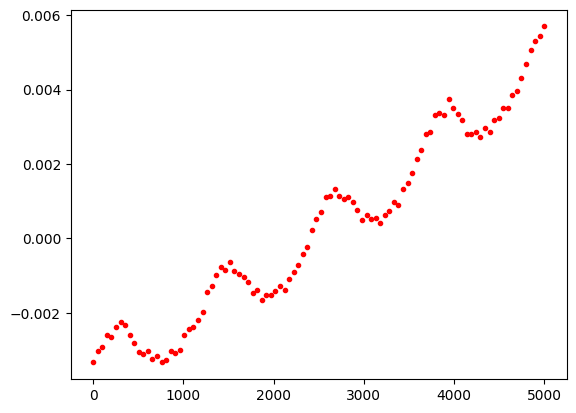

In [6]:
from matplotlib import pyplot as plt
plt.plot(oc_data["cycle"], oc_data["oc"], "r.")

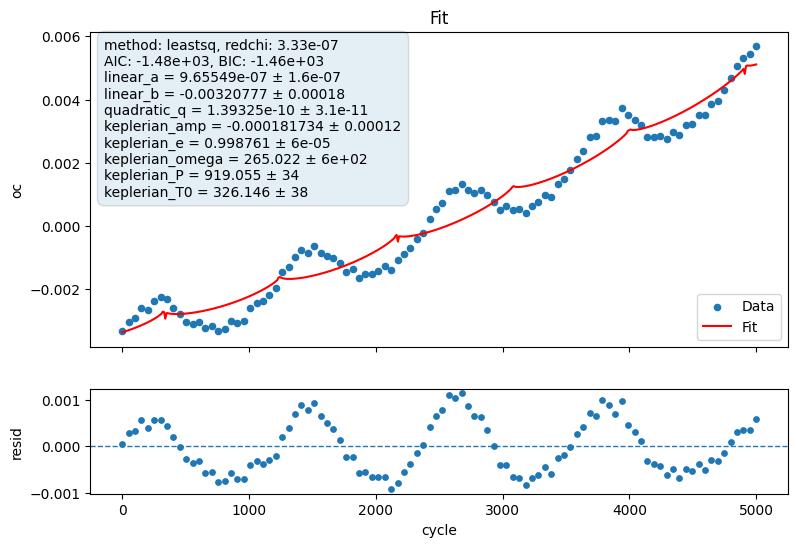

In [7]:
lin = Linear(
    a=Parameter(value=1e-6),
    b=Parameter(value=-3e-3),
)
quad = Quadratic(
    q=Parameter(value=3e-10),
)
kep = Keplerian(
    amp=Parameter(value=6e-4),
    e=Parameter(value=0.3, min=0, max=1),
    omega=Parameter(value=90.0),
    P=Parameter(value=1000.0),
    T0=Parameter(value=0.0),
)
res = oc_data.fit([lin, quad, kep])
oc_data.fit_and_report(res)